<a href="https://colab.research.google.com/github/fjadidi2001/Artificial_Intelligence_Learning/blob/master/FinalAdvanceAiProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

class QLearning:
    def __init__(self, num_nodes, destinations, learning_rate=0.8, discount_factor=0.95, exploration_prob=0.2, epochs=1000):
        self.num_nodes = num_nodes
        self.destinations = destinations
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.exploration_prob = exploration_prob
        self.epochs = epochs

        # Initialize Q matrix with zeros
        self.Q = np.zeros((num_nodes, num_nodes))

        # Initialize rewards matrix
        self.R = np.zeros((num_nodes, num_nodes))

    def add_edge(self, start_node, end_node, reward):
        self.R[start_node][end_node] = reward

    def train(self):
        for epoch in range(self.epochs):
            current_state = np.random.randint(0, self.num_nodes)

            while current_state not in self.destinations:
                possible_moves = np.where(self.R[current_state] > 0)[0]
                if np.random.rand() < self.exploration_prob:
                    action = np.random.choice(possible_moves)
                else:
                    action = np.argmax(self.Q[current_state])

                next_state = action
                reward = self.R[current_state][action]

                self.Q[current_state][action] = reward + self.discount_factor * np.max(self.Q[next_state])

                current_state = next_state

    def find_optimal_path(self, start_node):
        current_state = start_node
        optimal_path = [current_state]

        while current_state not in self.destinations:
            action = np.argmax(self.Q[current_state])
            current_state = action
            optimal_path.append(current_state)

        return optimal_path

# Example usage
num_nodes = 5
destinations = [3, 4]
q_learning = QLearning(num_nodes, destinations)

# Add edges and rewards (adjust the rewards based on your specific graph)
q_learning.add_edge(0, 1, 10)
q_learning.add_edge(0, 2, 5)
q_learning.add_edge(1, 3, 20)
q_learning.add_edge(2, 3, 30)
q_learning.add_edge(3, 4, 100)

# Train the Q-learning model
q_learning.train()

# Find optimal path for each node to the closest destination
for start_node in range(num_nodes):
    optimal_path = q_learning.find_optimal_path(start_node)
    print(f"Optimal path from node {start_node} to the closest destination: {optimal_path}")


Optimal path from node 0 to the closest destination: [0, 2, 3]
Optimal path from node 1 to the closest destination: [1, 3]
Optimal path from node 2 to the closest destination: [2, 3]
Optimal path from node 3 to the closest destination: [3]
Optimal path from node 4 to the closest destination: [4]


In [ ]:
!pip install networkx

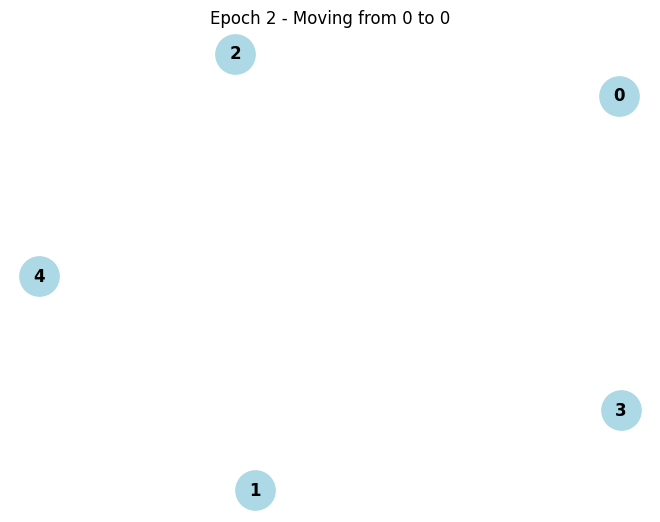

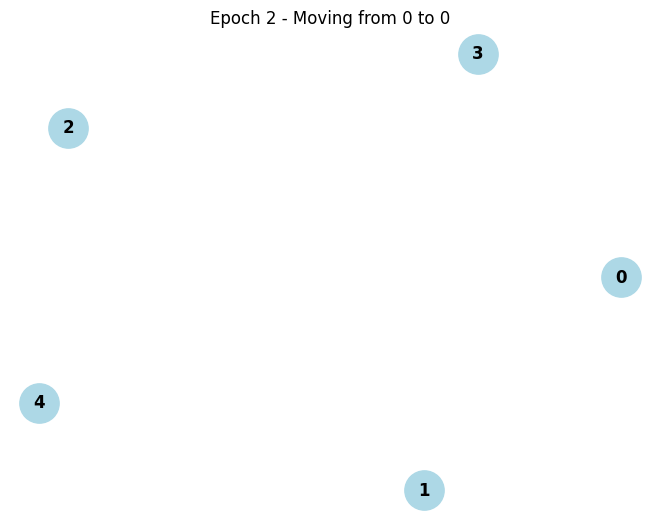

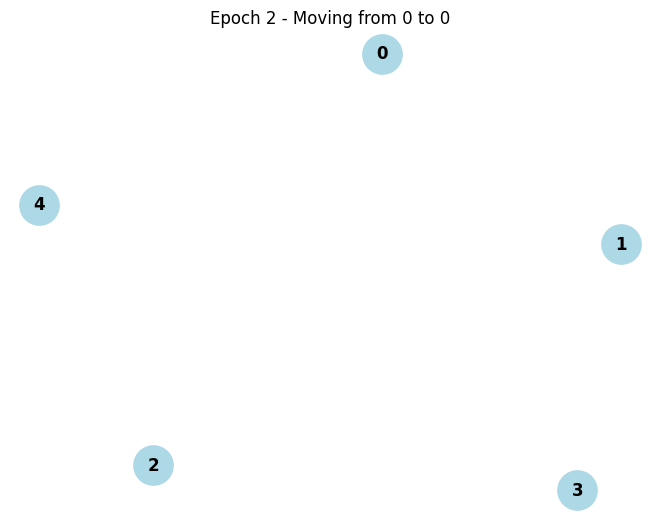

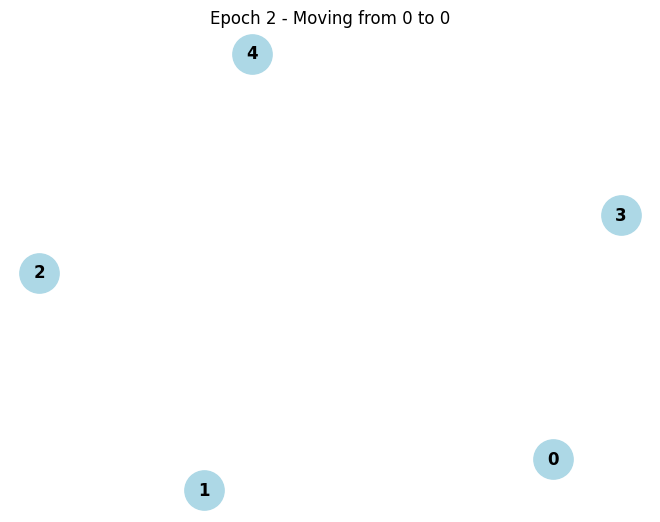

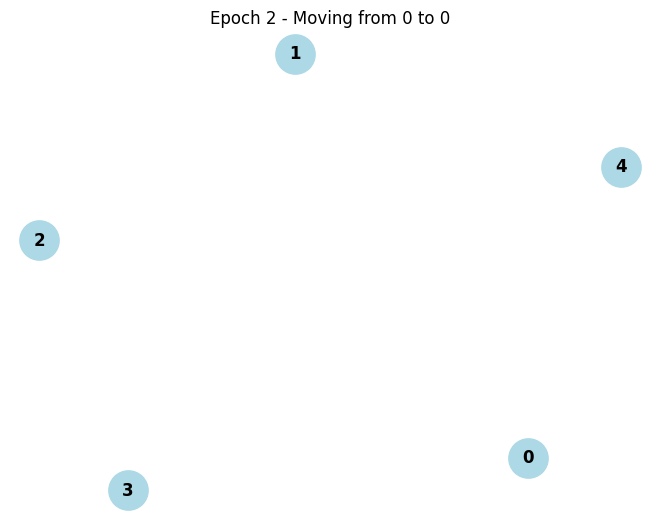

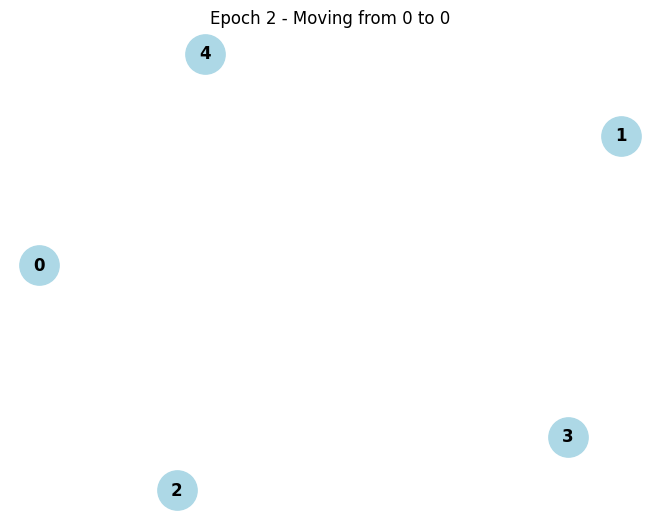

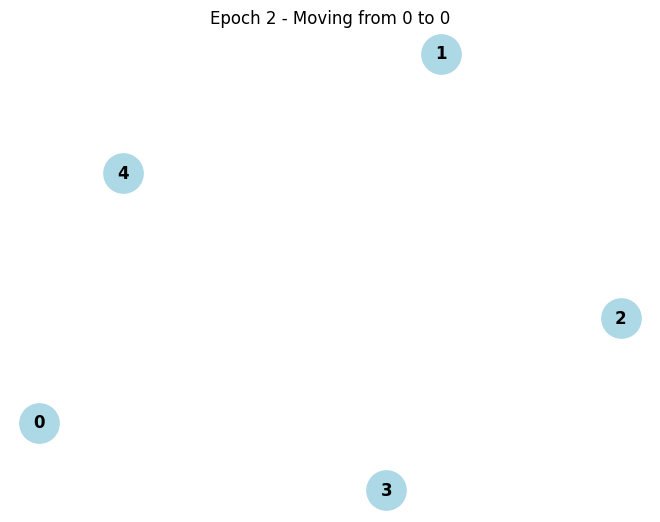

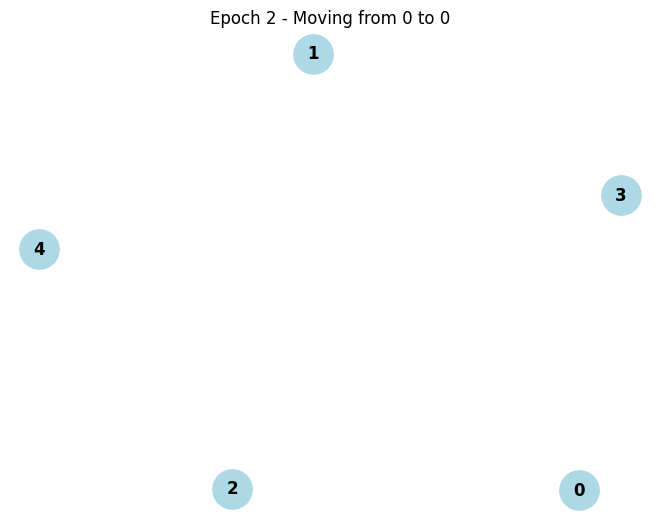

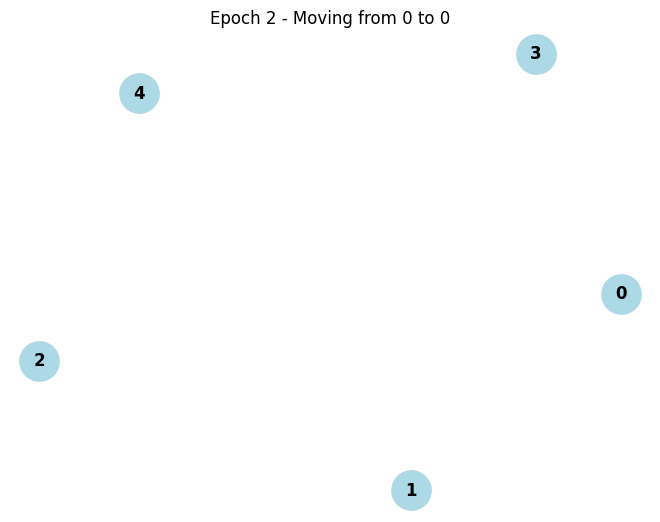

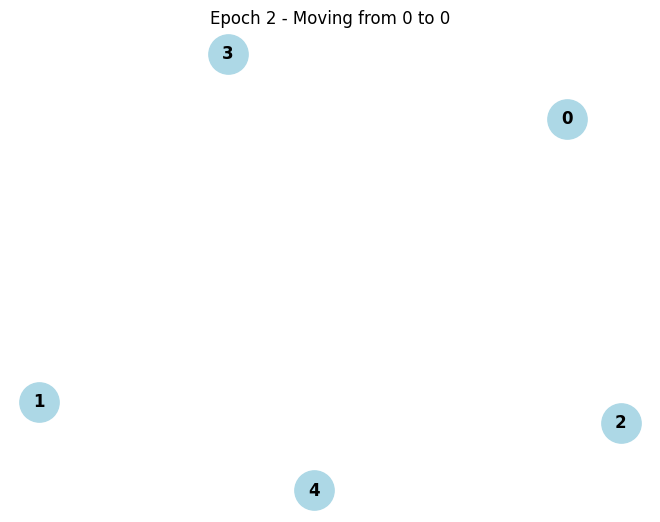

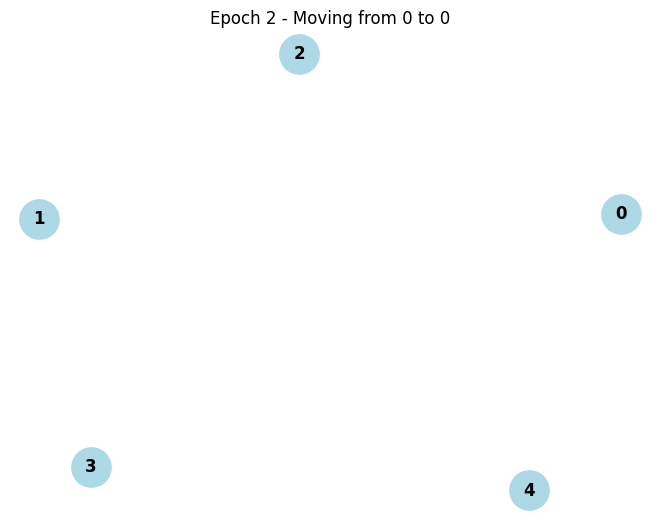

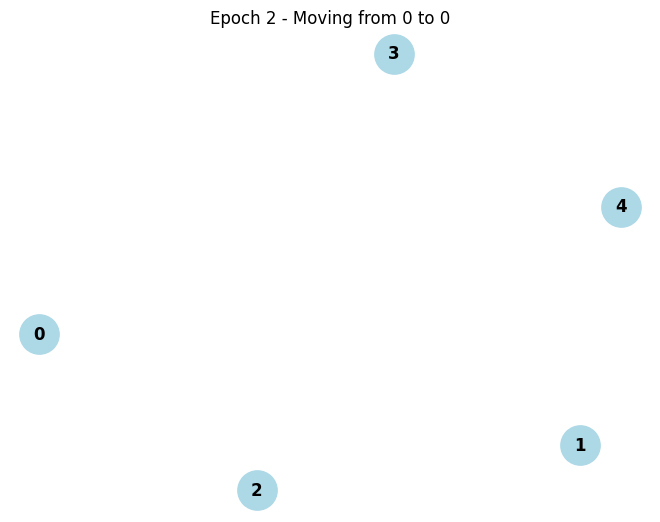

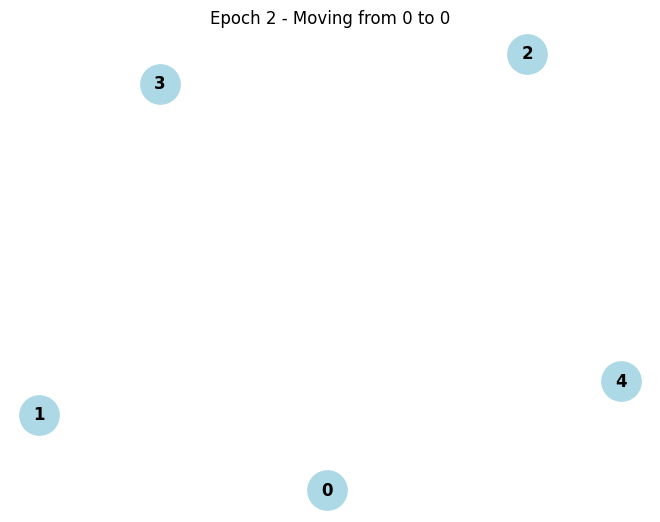

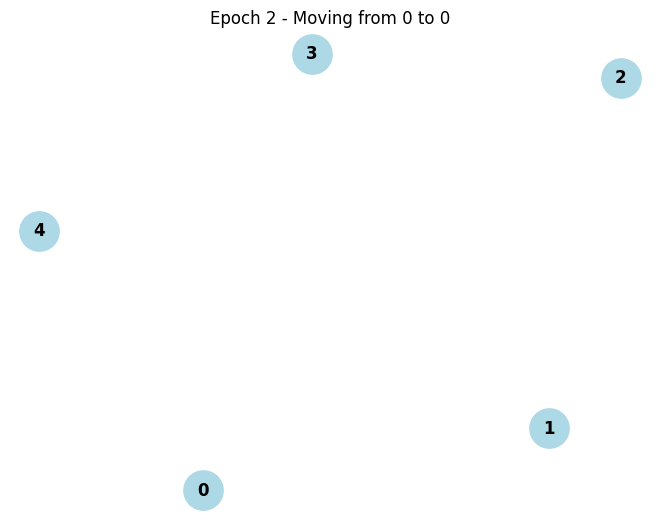

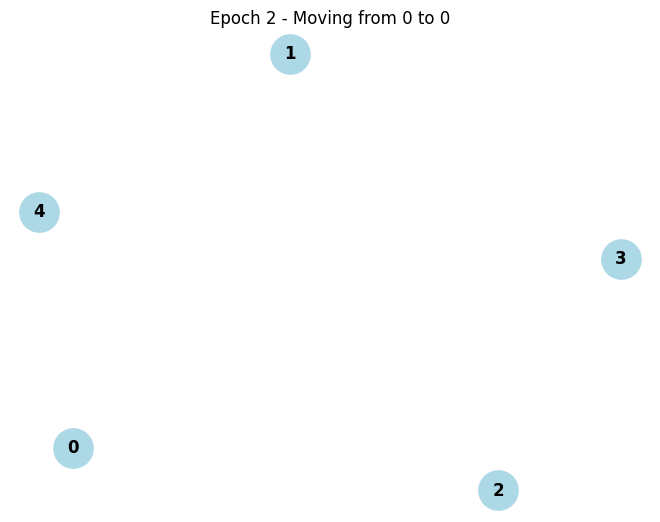

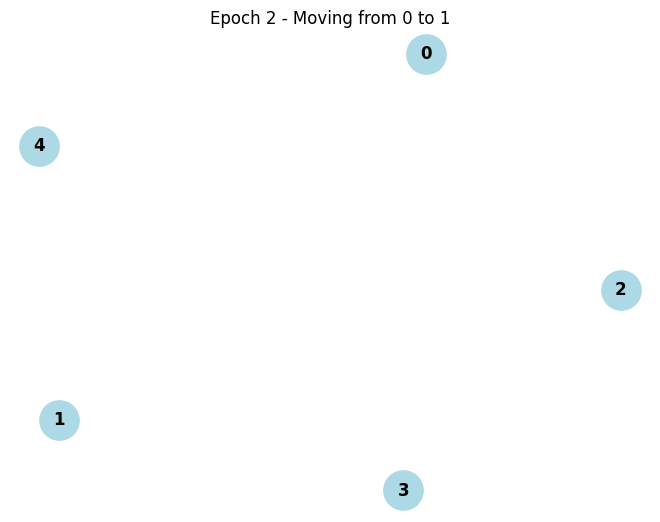

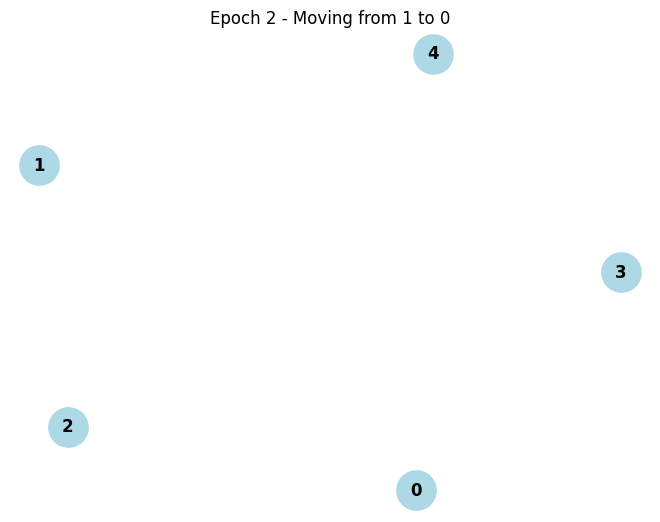

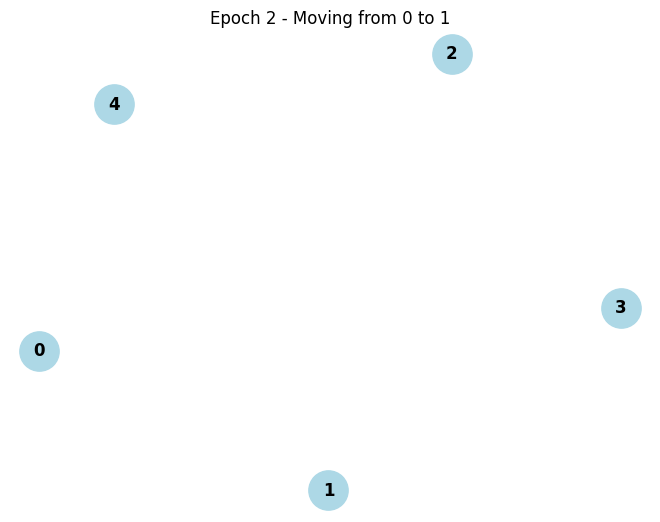

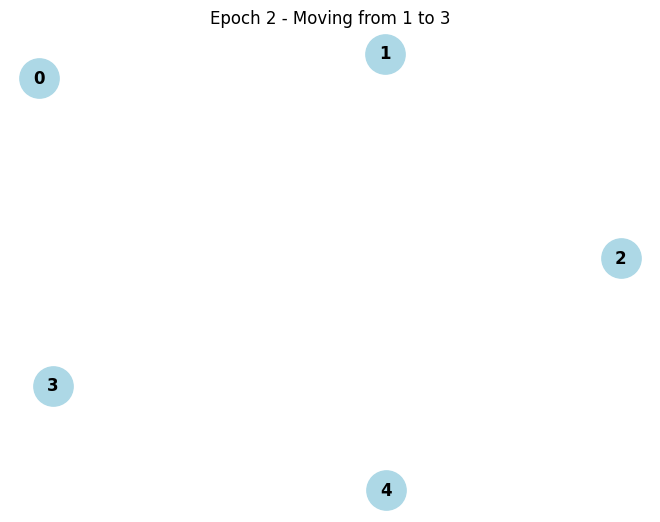

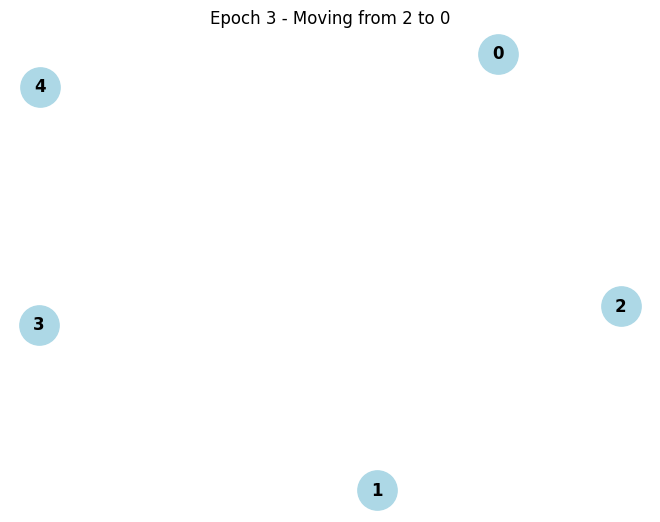

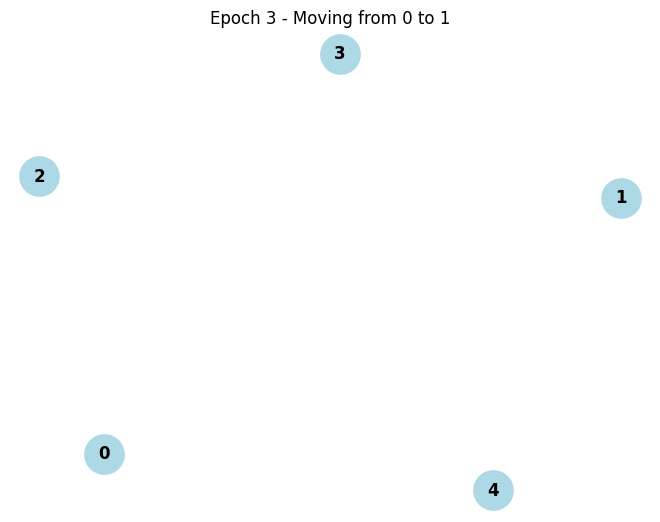

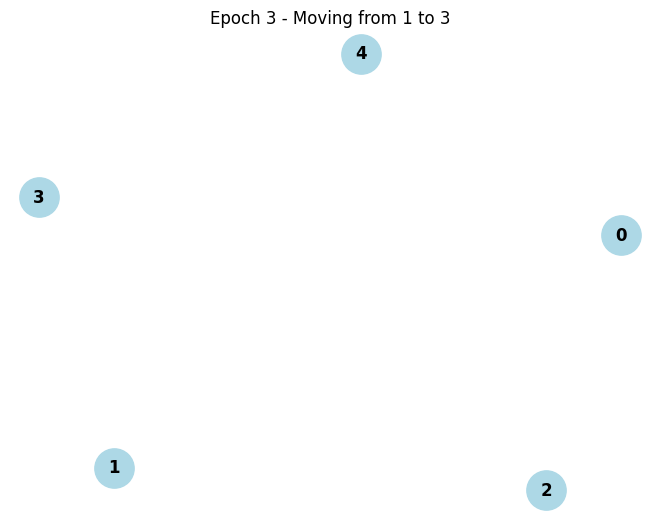

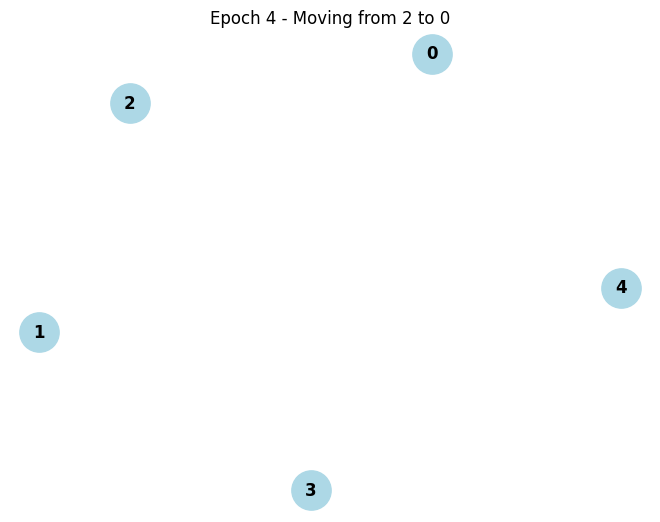

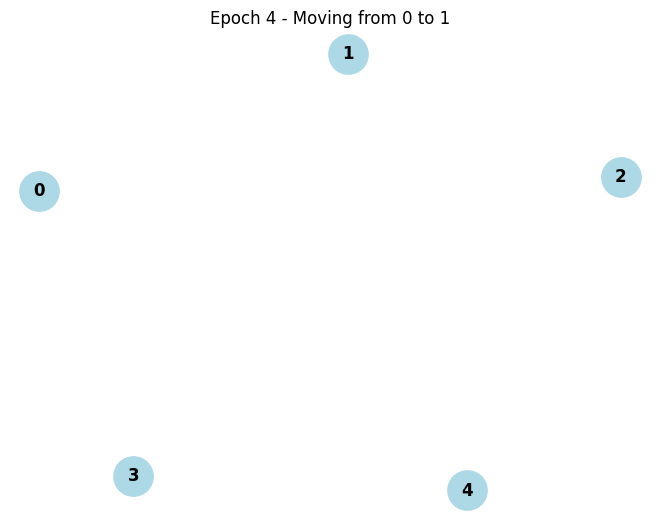

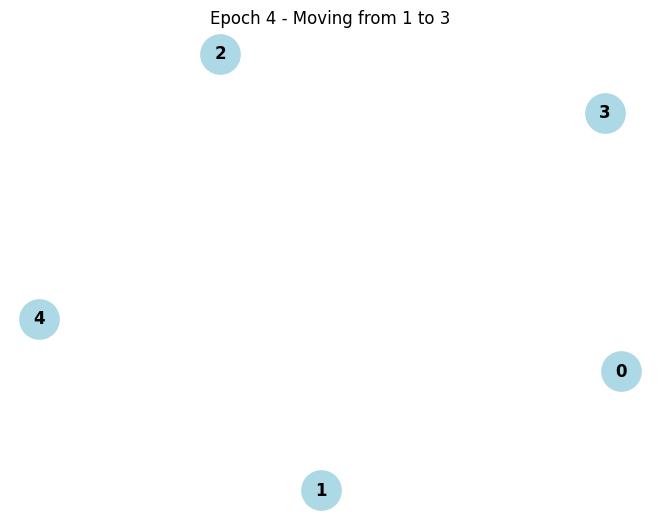

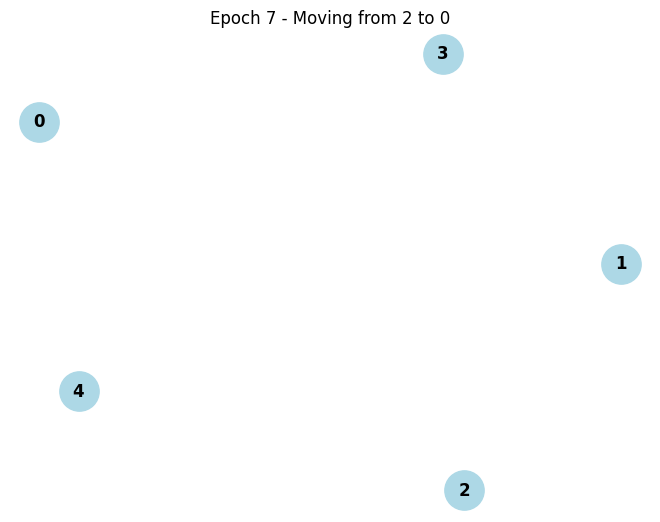

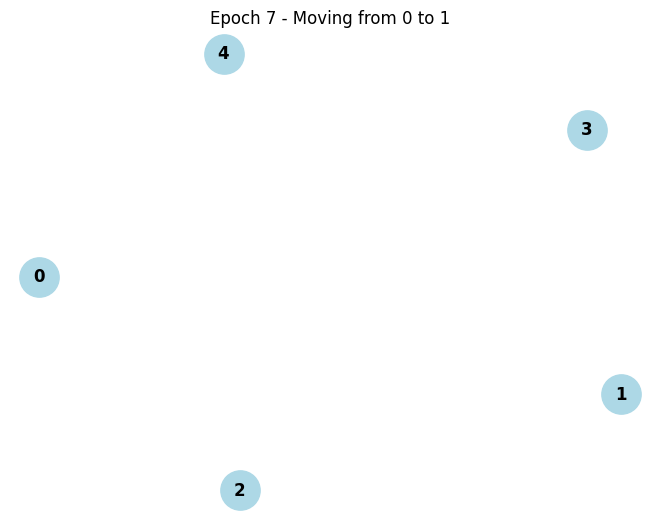

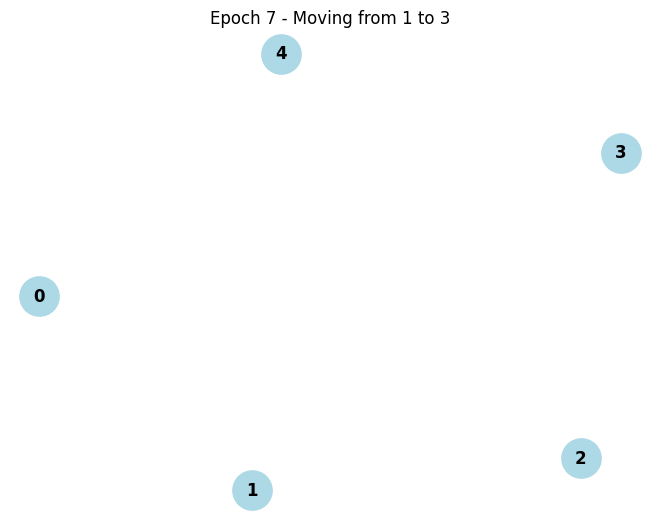

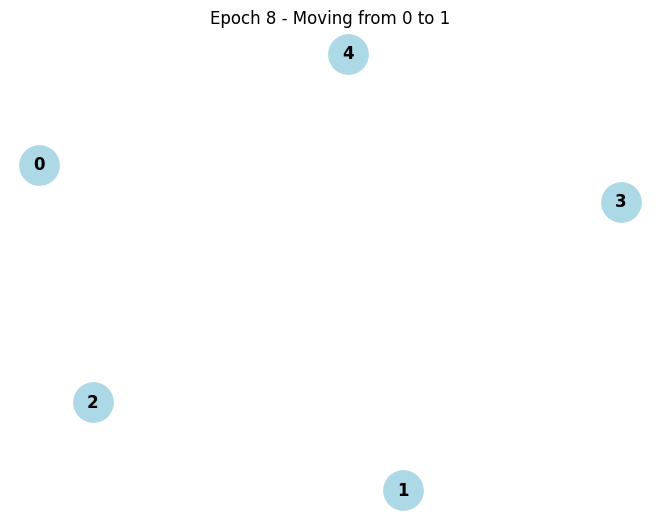

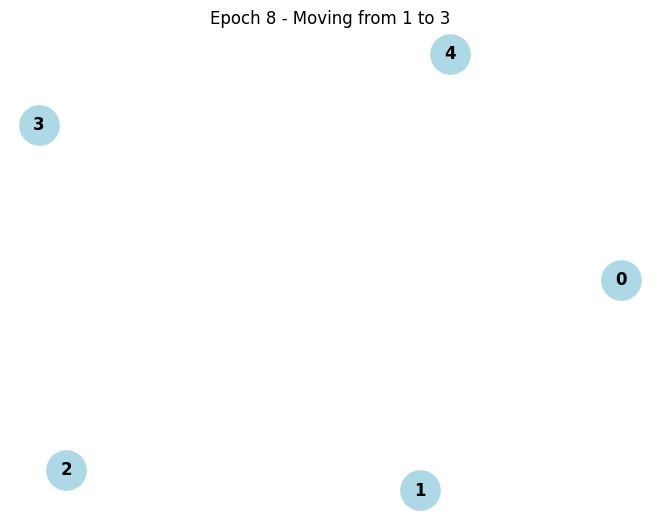

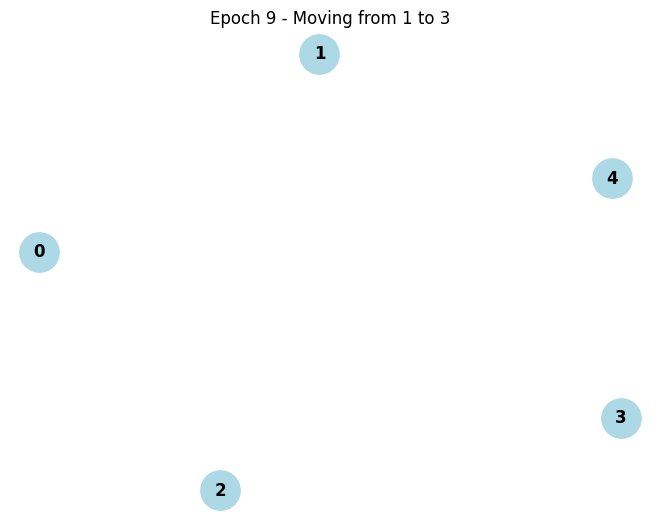

Optimal path from node 0 to the closest destination: [0, 1, 3]
Optimal path from node 1 to the closest destination: [1, 3]
Optimal path from node 2 to the closest destination: [2, 0, 1, 3]
Optimal path from node 3 to the closest destination: [3]
Optimal path from node 4 to the closest destination: [4]


In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

class QLearning:
    def __init__(self, num_nodes, destinations, learning_rate=0.8, discount_factor=0.95, exploration_prob=0.2, epochs=10):
        self.num_nodes = num_nodes
        self.destinations = destinations
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.exploration_prob = exploration_prob
        self.epochs = epochs

        # Initialize Q matrix with zeros
        self.Q = np.zeros((num_nodes, num_nodes))

        # Initialize rewards matrix
        self.R = np.zeros((num_nodes, num_nodes))

    def add_edge(self, start_node, end_node, reward):
        self.R[start_node][end_node] = reward

    def train(self, visualize=False):
        G = nx.Graph()
        G.add_nodes_from(range(self.num_nodes))

        for epoch in range(self.epochs):
            current_state = np.random.randint(0, self.num_nodes)

            while current_state not in self.destinations:
                possible_moves = np.where(self.R[current_state] > 0)[0]
                if np.random.rand() < self.exploration_prob:
                    action = np.random.choice(possible_moves)
                else:
                    action = np.argmax(self.Q[current_state])

                next_state = action
                reward = self.R[current_state][action]

                self.Q[current_state][action] = reward + self.discount_factor * np.max(self.Q[next_state])

                if visualize:
                    plt.clf()
                    nx.draw(G, with_labels=True, font_weight='bold', node_color='lightblue', node_size=800)
                    plt.title(f'Epoch {epoch + 1} - Moving from {current_state} to {action}')
                    plt.pause(0.5)

                current_state = next_state

        if visualize:
            plt.show()

    def find_optimal_path(self, start_node):
        current_state = start_node
        optimal_path = [current_state]

        while current_state not in self.destinations:
            action = np.argmax(self.Q[current_state])
            current_state = action
            optimal_path.append(current_state)

        return optimal_path

# Example usage with visualization
num_nodes = 5
destinations = [3, 4]
q_learning = QLearning(num_nodes, destinations)

# Add edges and rewards (adjust the rewards based on your specific graph)
q_learning.add_edge(0, 1, 10)
q_learning.add_edge(0, 2, 5)
q_learning.add_edge(1, 3, 20)
q_learning.add_edge(2, 3, 30)
q_learning.add_edge(3, 4, 100)

# Train the Q-learning model with visualization
q_learning.train(visualize=True)

# Find optimal path for each node to the closest destination
for start_node in range(num_nodes):
    optimal_path = q_learning.find_optimal_path(start_node)
    print(f"Optimal path from node {start_node} to the closest destination: {optimal_path}")


In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from scipy.sparse import lil_matrix

class QLearning:
    def __init__(self, num_nodes, destinations, learning_rate=0.8, discount_factor=0.95, exploration_prob=0.2, epochs=1000):
        self.num_nodes = num_nodes
        self.destinations = destinations
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.exploration_prob = exploration_prob
        self.epochs = epochs

        # Initialize dense Q matrix
        self.Q = np.zeros((num_nodes, num_nodes))

        # Initialize sparse rewards matrix
        self.R = lil_matrix((num_nodes, num_nodes), dtype=float)

    def add_edge(self, start_node, end_node, reward):
        self.R[start_node, end_node] = reward

    def visualize_graph(self, G, epoch, current_state=None, action=None):
        plt.clf()
        nx.draw(G, with_labels=True, font_weight='bold', node_color='lightblue', node_size=800)
        plt.title(f'Epoch {epoch} - Moving from {current_state} to {action}')
        plt.pause(0.1)  # Reduced pause time for faster execution

    def train(self):
        G = nx.complete_graph(self.num_nodes)

        # Add edges and rewards (adjust the rewards based on your specific graph)
        self.add_edge(0, 1, 10)
        self.add_edge(0, 2, 5)
        self.add_edge(1, 3, 20)
        self.add_edge(2, 3, 30)
        self.add_edge(3, 4, 100)

        # Display the initial graph
        self.visualize_graph(G, 0)

        for epoch in range(1, self.epochs + 1):
            current_state = np.random.randint(0, self.num_nodes)

            while current_state not in self.destinations:
                possible_moves = self.R[current_state].nonzero()[1]
                if np.random.rand() < self.exploration_prob:
                    action = np.random.choice(possible_moves)
                else:
                    probabilities = np.exp(self.Q[current_state, possible_moves])
                    probabilities /= np.sum(probabilities)
                    action = possible_moves[np.argmax(probabilities)]

                next_state = action
                reward = self.R[current_state, action]

                self.Q[current_state, action] = reward + self.discount_factor * np.max(self.Q[next_state])

                # Visualize the graph and update in each epoch
                self.visualize_graph(G, epoch, current_state, action)

                current_state = next_state

            # Print rewards and best path up to the current epoch
            print(f"\nEpoch {epoch} - Rewards:")
            for node in range(self.num_nodes):
                print(f"Node {node}: {self.Q[node]}")

            for start_node in range(self.num_nodes):
                optimal_path = self.find_optimal_path(start_node)
                print(f"Optimal path from node {start_node} to the closest destination: {optimal_path}")

    def find_optimal_path(self, start_node):
        current_state = start_node
        optimal_path = [current_state]

        while current_state not in self.destinations:
            action = np.argmax(self.Q[current_state])
            current_state = action
            optimal_path.append(current_state)

        return optimal_path

# Example usage with visualization and printing rewards for 5 nodes
num_nodes = 5
destinations = [3, 4]
q_learning = QLearning(num_nodes, destinations)

# Train the Q-learning model with visualization and printing rewards
q_learning.train()

plt.show()


In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

class QLearning:
    def __init__(self, num_nodes, destinations, learning_rate=0.8, discount_factor=0.95, exploration_prob=0.2, epochs=2):
        self.num_nodes = num_nodes
        self.destinations = destinations
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.exploration_prob = exploration_prob  # controls the balance between exploration and exploitation
        self.epochs = epochs

        # Initialize Q matrix and value function with zeros
        self.Q = np.zeros((num_nodes, num_nodes))
        self.V = np.zeros(num_nodes)

        # Initialize rewards matrix
        self.R = np.zeros((num_nodes, num_nodes))

    def add_edge(self, start_node, end_node, reward):
        self.R[start_node][end_node] = reward

    # def visualize_graph(self, G, epoch, current_state=None, action=None):
    #     plt.clf()
    #     nx.draw(G, with_labels=True, font_weight='bold', node_color='lightblue', node_size=800)
    #     plt.title(f'Epoch {epoch} - Moving from {current_state} to {action}')
    #     plt.pause(0.1)

    def train(self):
        G = nx.complete_graph(self.num_nodes)

        # Add edges and rewards (adjust the rewards based on your specific graph)
        self.add_edge(0, 1, 10)
        self.add_edge(0, 2, 5)
        self.add_edge(1, 3, 20)
        self.add_edge(2, 3, 30)
        self.add_edge(3, 4, 100)

        # Display the initial graph
        # self.visualize_graph(G, 0)

        for epoch in range(1, self.epochs + 1):
            current_state = np.random.randint(0, self.num_nodes)

            while current_state not in self.destinations:
                possible_moves = np.where(self.R[current_state] > 0)[0]

                # Exploration and exploitation
                if np.random.rand() < self.exploration_prob:
                    action = np.random.choice(possible_moves)
                else:
                    action = possible_moves[np.argmax(self.Q[current_state, possible_moves])]

                next_state = action
                reward = self.R[current_state, action]

                # Update Q matrix and value function
                self.Q[current_state, action] = (1 - self.learning_rate) * self.Q[current_state, action] + \
                                                self.learning_rate * (reward + self.discount_factor * np.max(self.Q[next_state]))
                self.V[current_state] = np.max(self.Q[current_state])

                # Visualize the graph and update in each epoch
                # self.visualize_graph(G, epoch, current_state, action)

                current_state = next_state

            # Print rewards, value, and best path up to the current epoch
            print(f"\nEpoch {epoch} - Rewards:")
            for node in range(self.num_nodes):
                print(f"Node {node} - Reward: {self.R[node]} - Value: {self.V[node]}")

            for start_node in range(self.num_nodes):
                optimal_path = self.find_optimal_path(start_node)
                print(f"Optimal path from node {start_node} to the closest destination: {optimal_path}")

    def find_optimal_path(self, start_node):
        current_state = start_node
        optimal_path = [current_state]

        while current_state not in self.destinations:
            action = np.argmax(self.Q[current_state])
            current_state = action
            optimal_path.append(current_state)

        return optimal_path

# Example usage with visualization and printing rewards for 5 nodes
num_nodes = 5
destinations = [3, 4]
q_learning = QLearning(num_nodes, destinations)

# Train the Q-learning model with visualization and printing rewards
q_learning.train()

plt.show()



Epoch 1 - Rewards:
Node 0 - Reward: [ 0. 10.  5.  0.  0.] - Value: 8.0
Node 1 - Reward: [ 0.  0.  0. 20.  0.] - Value: 16.0
Node 2 - Reward: [ 0.  0.  0. 30.  0.] - Value: 0.0
Node 3 - Reward: [  0.   0.   0.   0. 100.] - Value: 0.0
Node 4 - Reward: [0. 0. 0. 0. 0.] - Value: 0.0
Optimal path from node 0 to the closest destination: [0, 1, 3]
Optimal path from node 1 to the closest destination: [1, 3]
Optimal path from node 2 to the closest destination: [2, 0, 1, 3]
Optimal path from node 3 to the closest destination: [3]
Optimal path from node 4 to the closest destination: [4]

Epoch 2 - Rewards:
Node 0 - Reward: [ 0. 10.  5.  0.  0.] - Value: 8.0
Node 1 - Reward: [ 0.  0.  0. 20.  0.] - Value: 19.2
Node 2 - Reward: [ 0.  0.  0. 30.  0.] - Value: 0.0
Node 3 - Reward: [  0.   0.   0.   0. 100.] - Value: 0.0
Node 4 - Reward: [0. 0. 0. 0. 0.] - Value: 0.0
Optimal path from node 0 to the closest destination: [0, 1, 3]
Optimal path from node 1 to the closest destination: [1, 3]
Optimal path

In [1]:
import numpy as np

class QLearning:
    def __init__(self, num_nodes, destinations, learning_rate=0.8, discount_factor=0.95, exploration_prob=0.2, epochs=2):
        self.num_nodes = num_nodes
        self.destinations = destinations
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.exploration_prob = exploration_prob
        self.epochs = epochs
        self.Q = np.zeros((num_nodes, num_nodes))

    def choose_action(self, state):
        if np.random.uniform(0, 1) < self.exploration_prob:
            return np.random.choice(np.arange(self.num_nodes))
        else:
            return np.argmax(self.Q[state, :])

    def update_q_table(self, state, action, next_state, reward):
        best_next_action = np.argmax(self.Q[next_state, :])
        self.Q[state, action] = (1 - self.learning_rate) * self.Q[state, action] + \
                                self.learning_rate * (reward + self.discount_factor * self.Q[next_state, best_next_action])

    def train(self, graph):
        for epoch in range(self.epochs):
            for state in range(self.num_nodes):
                action = self.choose_action(state)
                next_state = np.random.choice(np.arange(self.num_nodes))
                reward = self.calculate_reward(graph, state, next_state)
                self.update_q_table(state, action, next_state, reward)

    def calculate_reward(self, graph, current_node, next_node):
        if next_node in self.destinations:
            return 100
        elif graph[current_node][next_node] < float('inf'):
            return 10 / graph[current_node][next_node]  # Lower reward for non-destination edges
        else:
            return 0

    def find_optimal_path(self, source_node):
        current_node = source_node
        path = [current_node]

        while current_node not in self.destinations:
            next_node = np.argmax(self.Q[current_node, :])
            path.append(next_node)
            current_node = next_node

        return path

# Example usage:
num_nodes = 5
destinations = [3]
graph = np.array([
    [0, 2, 5, float('inf'), float('inf')],
    [2, 0, 3, 1, float('inf')],
    [5, 3, 0, 4, 2],
    [float('inf'), 1, 4, 0, 7],
    [float('inf'), float('inf'), 2, 7, 0]
])

q_learning = QLearning(num_nodes, destinations)
q_learning.train(graph)

source_node = 0
optimal_path = q_learning.find_optimal_path(source_node)
print(f"Optimal path from node {source_node} to destination {destinations}: {optimal_path}")


<ipython-input-1-9f2bce3c3a0f>:36: RuntimeWarning: divide by zero encountered in double_scalars
  return 10 / graph[current_node][next_node]  # Lower reward for non-destination edges


KeyboardInterrupt: 

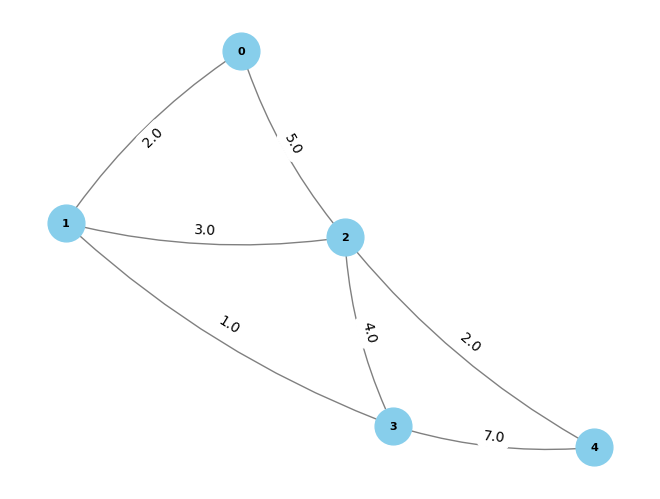

In [6]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Step 1: Create the graph
num_nodes = 5
graph = np.array([
    [0, 2, 5, float('inf'), float('inf')],
    [2, 0, 3, 1, float('inf')],
    [5, 3, 0, 4, 2],
    [float('inf'), 1, 4, 0, 7],
    [float('inf'), float('inf'), 2, 7, 0]
])

G = nx.Graph()

# Add edges to the graph based on the adjacency matrix
for i in range(num_nodes):
    for j in range(i+1, num_nodes):
        if graph[i, j] != float('inf'):
            G.add_edge(i, j, weight=graph[i, j])

# Step 2: Display the graph
pos = nx.spring_layout(G)  # You can change the layout algorithm as needed
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_color='black', font_size=8, edge_color='gray', connectionstyle='arc3,rad=0.1', arrows=True)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()


In [7]:
import networkx as nx

# Create the graph object
G = nx.Graph()

# Define the nodes
nodes = ['New York, NY', 'Los Angeles, CA', 'Chicago, IL', 'Houston, TX', 'Phoenix, AZ', 'Dallas, TX', 'Miami, FL']

# Add the nodes to the graph
G.add_nodes_from(nodes)

# Define the edges and their distances
edges = [('New York, NY', 'Chicago, IL', {'distance': 790}),
         ('New York, NY', 'Miami, FL', {'distance': 1300}),
         ('Chicago, IL', 'Dallas, TX', {'distance': 960}),
         ('Dallas, TX', 'Houston, TX', {'distance': 240}),
         ('Houston, TX', 'Phoenix, AZ', {'distance': 1170}),
         ('Phoenix, AZ', 'Los Angeles, CA', {'distance': 380}),
         ('Los Angeles, CA', 'Dallas, TX', {'distance': 1240}),
         ('Los Angeles, CA', 'Chicago, IL', {'distance': 2010})]

# Add the edges to the graph
G.add_edges_from(edges)

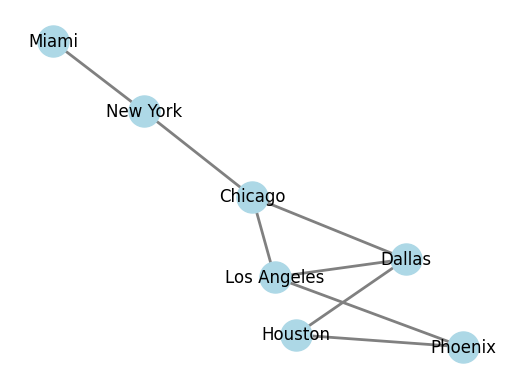

In [8]:
import matplotlib.pyplot as plt

# set positions for the nodes (optional)
pos = nx.spring_layout(G)

# draw the nodes and edges
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=500)
nx.draw_networkx_edges(G, pos, edge_color='gray', width=2)

# draw edge labels
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# draw node labels
node_labels = {node: node.split(',')[0] for node in G.nodes()}
nx.draw_networkx_labels(G, pos, labels=node_labels)

# show the plot
plt.axis('off')
plt.show()

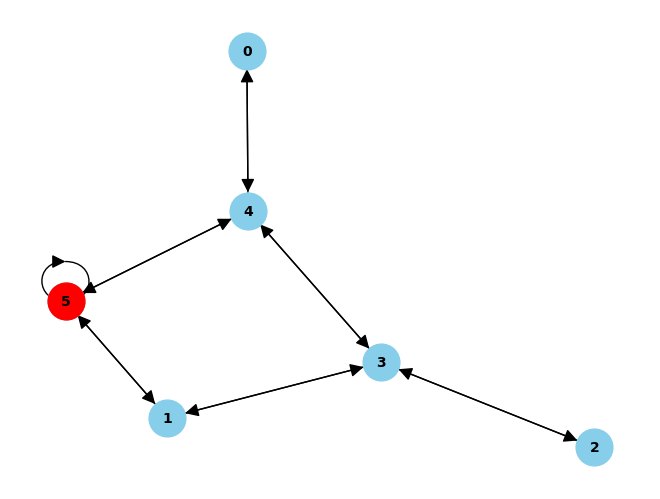

In [28]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add nodes
G.add_nodes_from(range(6))

# Add edges based on your description
edges = [(1, 3), (1, 5), (2, 3), (0, 4), (4, 0), (3, 2), (3, 1), (5, 1), (3,4), (4, 3), (4, 5), (5, 4), (5, 5)]
G.add_edges_from(edges)

# Specify node 5 as the destination
destination_node = 5

# Visualize the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=10, font_color="black", font_weight="bold", arrowsize=20)

# Highlight the destination node
nx.draw_networkx_nodes(G, pos, nodelist=[destination_node], node_color="red", node_size=700)

# Show the graph
plt.show()


In [31]:
import numpy as np
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Add nodes
G.add_nodes_from(range(6))

# Updated edges based on your description
edges = [(1, 3), (1, 5), (2, 3), (0, 4), (4, 0), (3, 2), (3, 1), (5, 1), (3, 4), (4, 3), (4, 5), (5, 4), (5, 5)]
G.add_edges_from(edges)

# Get the adjacency matrix
adjacency_matrix = nx.adjacency_matrix(G).todense()

# Initialize the reward matrix with -1 as null values
reward_matrix = np.full_like(adjacency_matrix, -1, dtype=float)

# Update the reward matrix based on existing edges
for edge in edges:
    start_node, end_node = edge
    action_column = end_node
    state_row = start_node
    if (start_node, end_node) in [(1, 5), (4, 5), (5, 5)]:
        reward_matrix[state_row, action_column] = 100
    else:
        reward_matrix[state_row, action_column] = 0

print("Reward Matrix:")
print(reward_matrix)


Reward Matrix:
[[ -1.  -1.  -1.  -1.   0.  -1.]
 [ -1.  -1.  -1.   0.  -1. 100.]
 [ -1.  -1.  -1.   0.  -1.  -1.]
 [ -1.   0.   0.  -1.   0.  -1.]
 [  0.  -1.  -1.   0.  -1. 100.]
 [ -1.   0.  -1.  -1.   0. 100.]]


In [33]:
import numpy as np

# Define the number of states and actions
num_states = 6  # Assuming there are 6 nodes in your graph
num_actions = 6  # Assuming each node has an action to move to any other node

# Initialize the Q-matrix with zeros
Q_matrix = np.zeros((num_states, num_actions))

# Print the initial Q-matrix
print("Initial Q-matrix:")
print(Q_matrix)


Initial Q-matrix:
[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
